In [113]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
import utils
import joblib
from tqdm import tqdm
reload(utils)

from utils import Monitor
%matplotlib inline

In [114]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w


In [118]:
VERSION = 'sac,treechop_v2,max_camera_turn=10,sample_hum_ratio=0.5'
monitor = Monitor('monitor_'+VERSION+'_copy.pkl', 'monitoring')

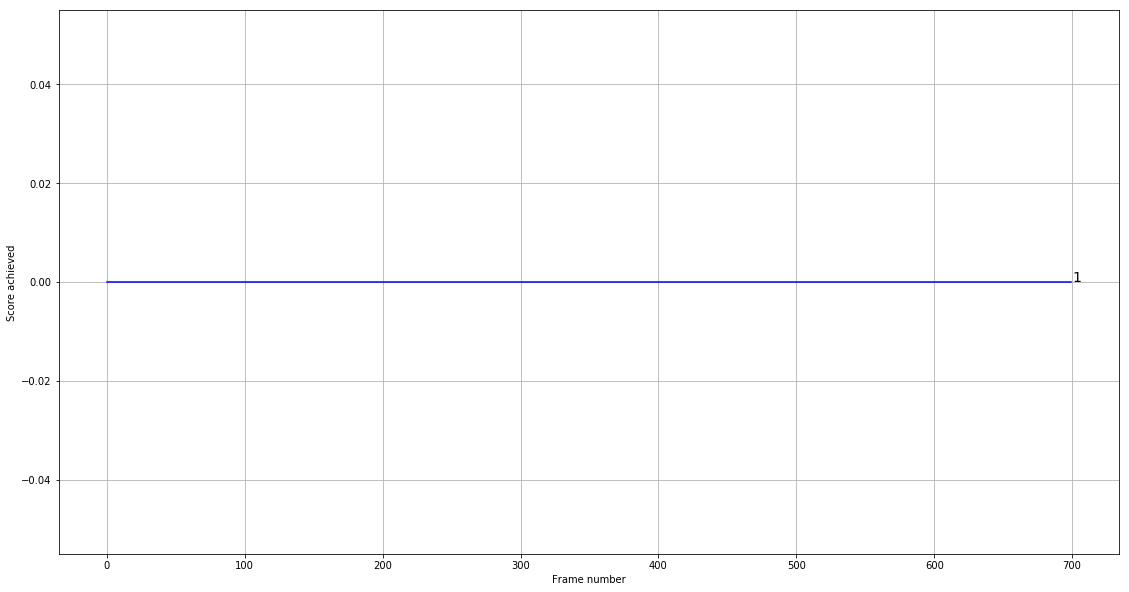

In [119]:
monitor.load()
num_scores = sum(['score_' in k for k in monitor.data.keys()])
maxs = []
means = []
mins = []
plt.figure(figsize=(19,10))
for i in range(num_scores):
    scores = monitor.data['score_'+str(i+1)]
    plt.plot(scores, 'b', alpha=(max([(i+1)/num_scores,0.25])), label=i+1)
    plt.text(len(scores), scores[-1], str(i+1), fontsize=14)
    maxs.append(np.array(scores).max())
    means.append(np.array(scores).mean())
    mins.append(np.array(scores).min())
plt.xlabel('Frame number')
plt.ylabel('Score achieved')
plt.grid(which='both')

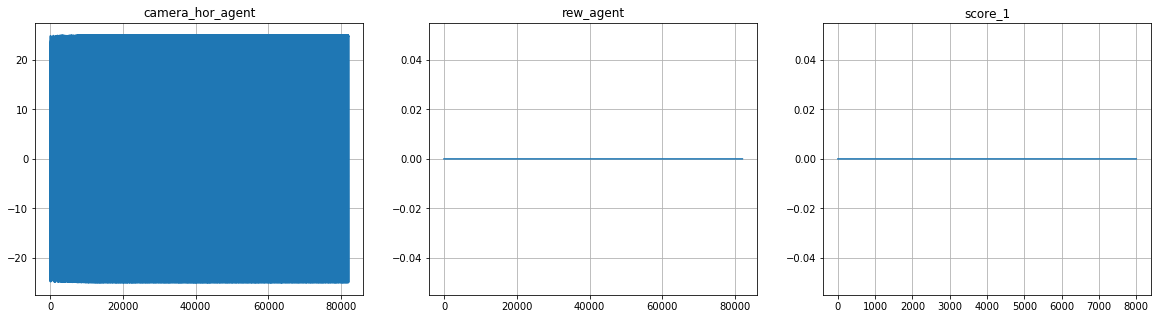

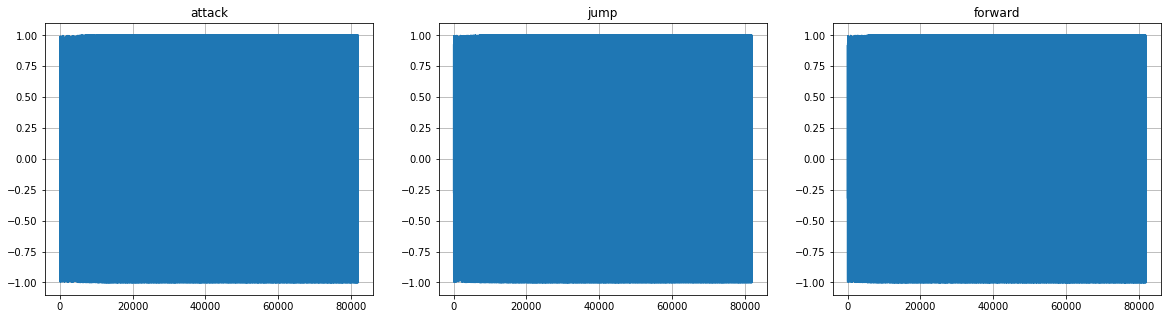

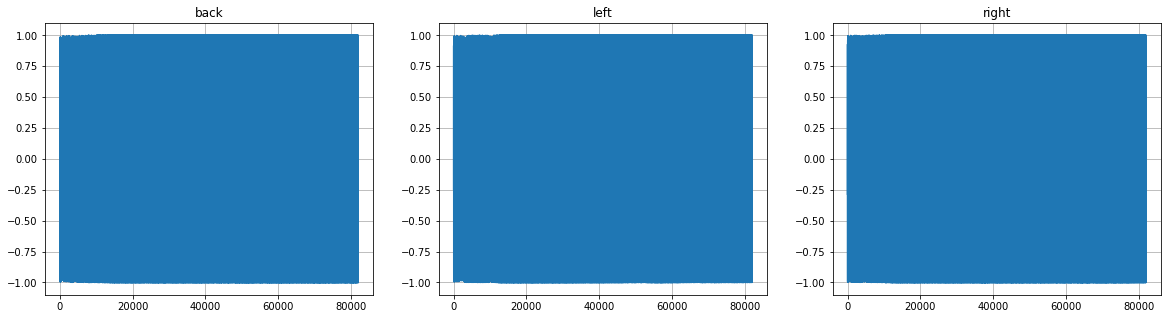

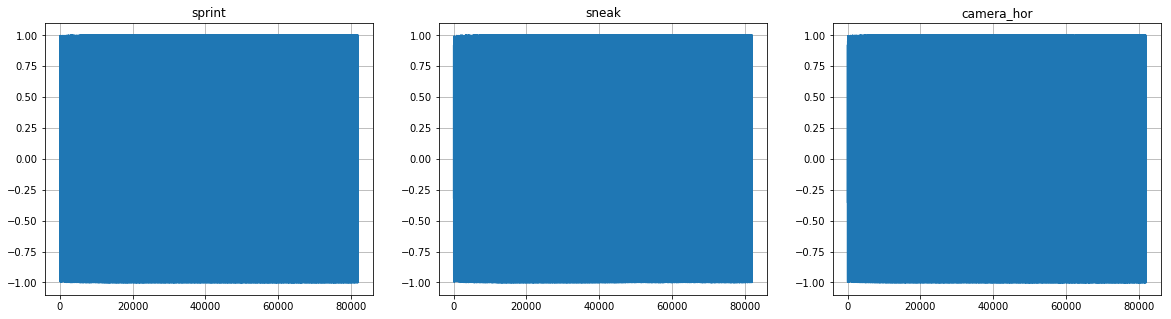

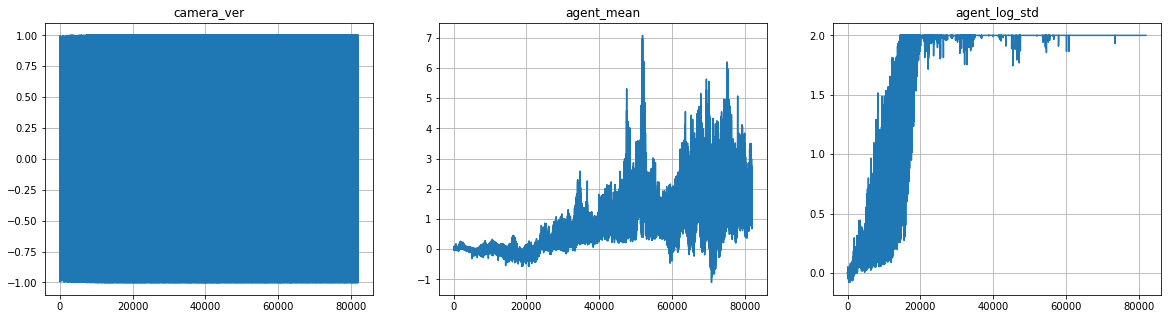

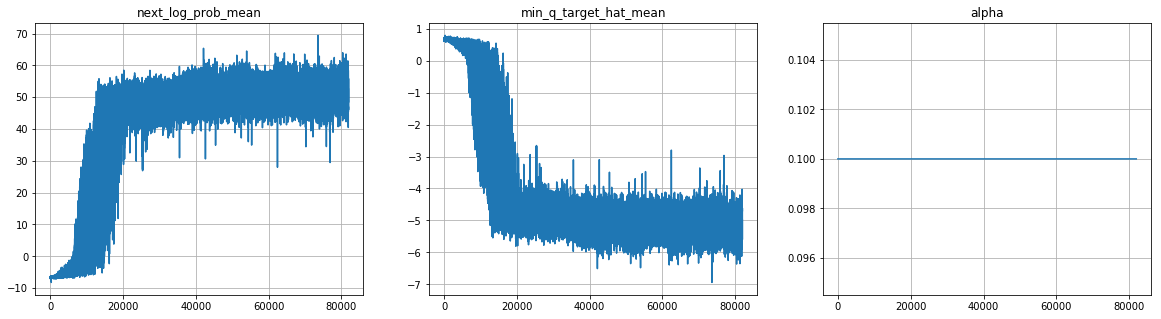

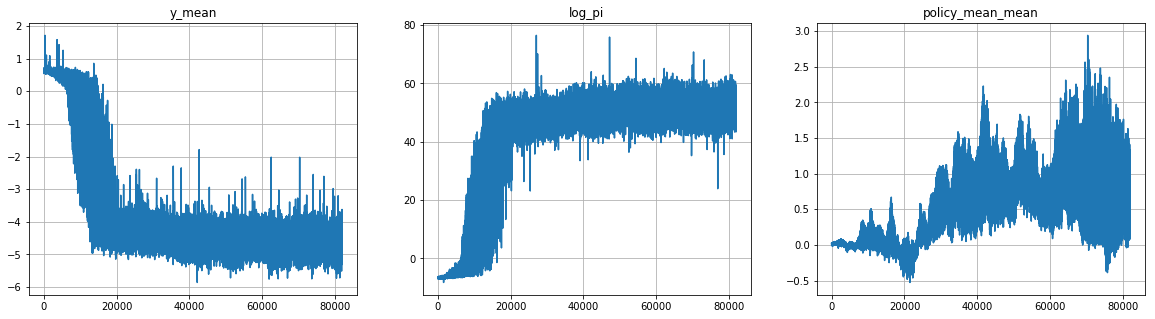

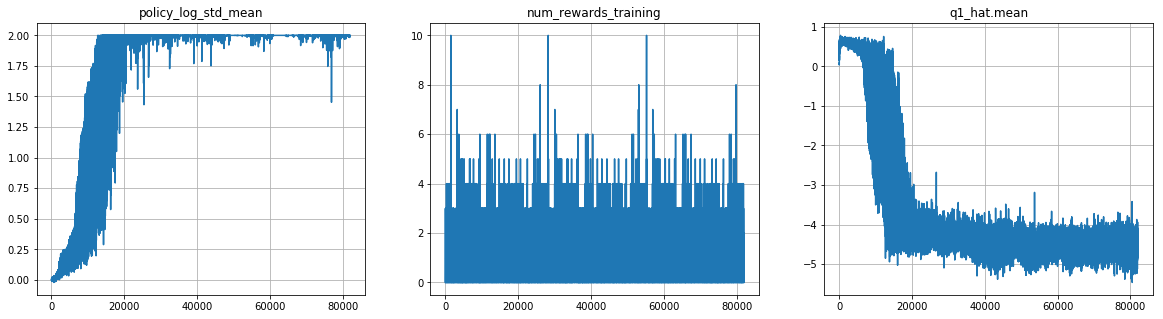

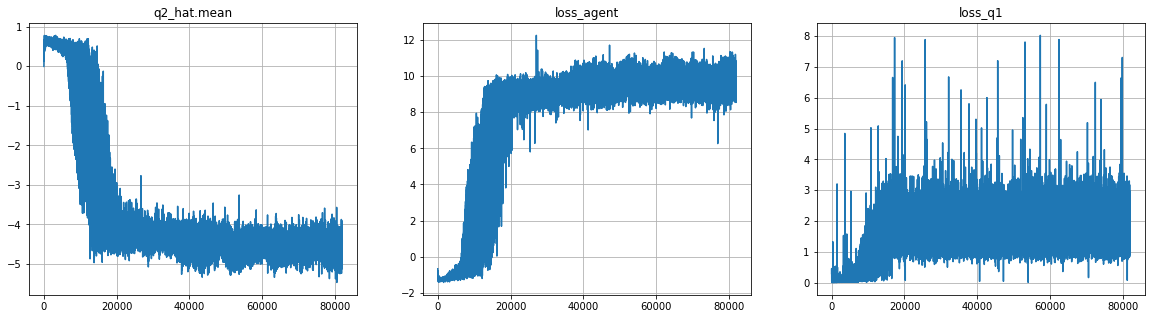

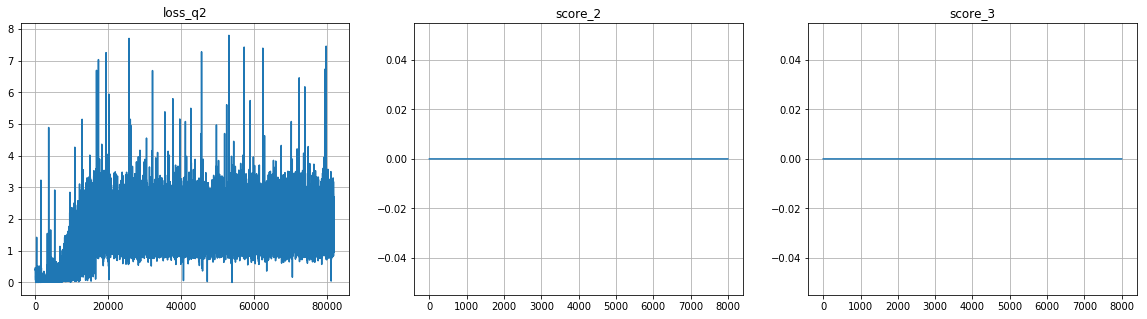

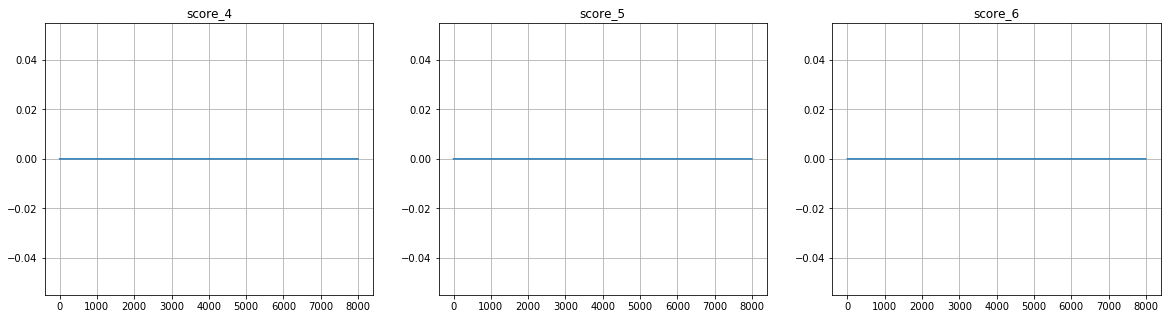

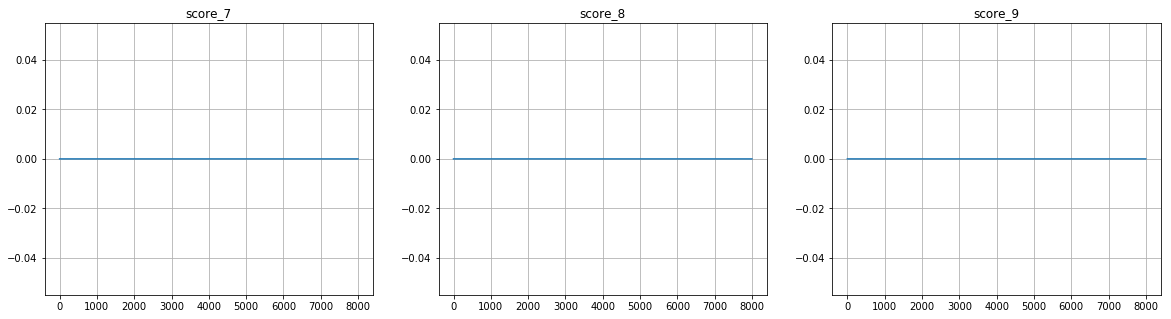

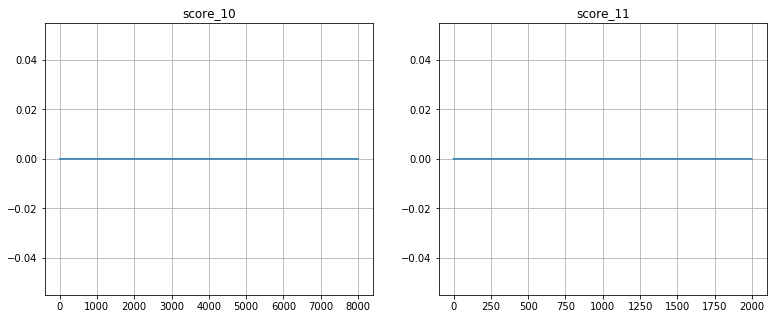

In [117]:
monitor.plot_all()

In [84]:
monitor.load()
last_rows = -400
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(monitor.data['q_agent'][last_rows:])
#ax2 = ax1.twinx()
ax1.plot( monitor.data['rew_agent'][last_rows:], color='r' , alpha=0.9)

import pandas as pd
pd.DataFrame([monitor.data['q_agent'][last_rows:],monitor.data['rew_agent'][last_rows:]] ).T.corr()

KeyboardInterrupt: 

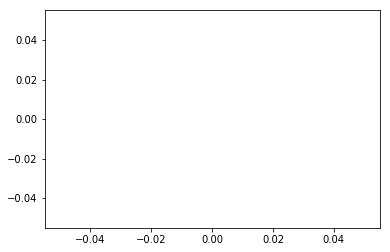

In [221]:
plt.plot(maxs, color='b', alpha=0.5)
plt.plot(means, color='b')
plt.plot(mins, color='b', alpha=0.5)

In [ ]:
monitor.plot(['y_mean', 'q1_hat.mean','q2_hat.mean'])

In [ ]:
plt.plot( np.array(monitor.data['y_mean']) - np.array(monitor.data['q1_hat.mean']) )

In [37]:
import torch

In [55]:
np.exp(2)

7.38905609893065

In [59]:
normal = torch.distributions.Normal(0, 320)
np.mean([float(normal.log_prob(normal.sample())) for i in range(100)])

-7.178970432281494

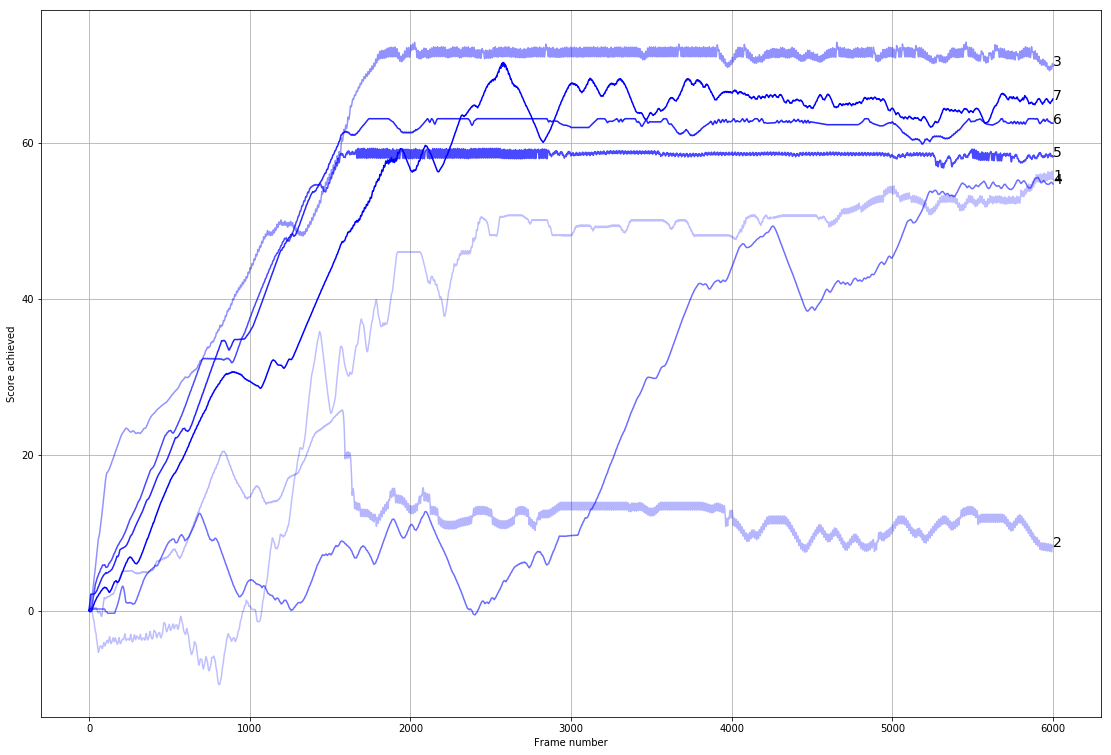

In [20]:
scores_per_episode = pickle.load(open('current_score.pkl','rb'))
#scores_per_episode = scores_per_episode[-10:]
plt.figure(figsize=(19,13))
for scores,num in zip(scores_per_episode, range(len(scores_per_episode))):
    plt.plot(scores, 'b', alpha=(max([(num+1)/len(scores_per_episode),0.25])), label=num)
    plt.text(len(scores), scores[-1], str(num+1), fontsize=14)
#    scores_averaged = moving_average(scores, 30)
#    plt.plot( scores_averaged )
plt.xlabel('Frame number')
plt.ylabel('Score achieved')
plt.grid(which='both')

In [ ]:
scores_per_episode = pickle.load(open('scores/current_score_sac'rb'))
#scores_per_episode = scores_per_episode[-10:]
plt.figure(figsize=(19,13))
for scores,num in zip(scores_per_episode, range(len(scores_per_episode))):
    plt.plot(scores, 'b', alpha=(max([(num+1)/len(scores_per_episode),0.25])), label=num)
    plt.text(len(scores), scores[-1], str(num+1), fontsize=14)
#    scores_averaged = moving_average(scores, 30)
#    plt.plot( scores_averaged )
plt.xlabel('Frame number')
plt.ylabel('Score achieved')
plt.grid(which='both')

In [ ]:
plt.plot([max(i) for i in scores_per_episode])

In [ ]:
weight_sigmas = pickle.load(open('monitoring/weight_sigmas_noise=0.3,new_bn,one_noise,lr=1E-4,cam_fact=0.001,tau=0.005,change_order_step.pkl','rb'))
plt.plot(np.array([weight_sigmas[0]]).T)

In [ ]:
losses = pickle.load(open('monitoring/losses_noise=0.3,new_bn,one_noise,lr=1E-4,cam_fact=0.001,tau=0.005,change_order_step.pkl','rb'))
plt.plot(losses[0][-50000:])

In [ ]:
plt.plot(losses[1][-50000:])

In [ ]:
# for rainbow:

In [ ]:
to_plot = pickle.load(open('max_parameters.pkl','rb'))
plt.figure(figsize=(10,6))
plt.plot(to_plot)
plt.xlabel('Step')
plt.ylabel('Max parameter')
plt.grid()

In [ ]:
#### scores = pickle.load(open('scores.pickle','rb'))
plt.figure(figsize=(10,6))
plt.plot(scores)
plt.plot( scores_averaged )
plt.xlabel('Episode number')
plt.ylabel('Score achieved')
plt.grid()

In [ ]:
layer_rotations = pickle.load(open('layer_rotations.pickle','rb'))
plt.figure(figsize=(10,6))
plt.plot(np.abs(np.array(layer_rotations)).mean(1))
plt.xlabel('Episode number')
plt.ylabel('Mean Abs Layer Rotation')
plt.grid()


In [16]:
scores = pickle.load(open('current_score.pkl','rb'))
plt.plot(scores)
plt.grid()

Error in callback <function flush_figures at 0x7f521af460d0> (for post_execute):


KeyboardInterrupt: 

In [15]:
scores

[55.3005256652832,
 8.218120574951172,
 69.87142086029053,
 54.73269844055176,
 58.25011968612671,
 62.524187088012695,
 65.61680316925049]

In [ ]:
scores = pickle.load(open('scores.pickle','rb'))
plt.plot(scores)
plt.grid()

In [ ]:
import time
def get_time():
    return time.asctime( time.localtime(time.time()) )


In [ ]:
get_time()